# Group Case Study -Telecom Churn

### The Problem Statement mentioned on upGrad Module
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Importing Libraries

In [1]:
# First let's Import the required libraries for upcoming operations on the provided data sets

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import itertools
from pprint import pprint

In [2]:
# Action to filter out the warnings that may pop-up

import warnings 
warnings.filterwarnings("ignore")

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score,f1_score
from sklearn.metrics import precision_recall_curve
from imblearn.metrics import sensitivity_specificity_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [4]:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [5]:
# Setting display options
pd.set_option("display.max_columns", None,"display.max_rows", None)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The Dataset

### Telecom Churn

We are given Data Set in the form of CSV File called 'Telecom Churn Data'

## Loading the Data

In [6]:
# Here we are reading the csv file named as 'Lead' with 'read_csv' command
telecom_data = pd.read_csv(r"D:\PG\Courses\New folder\Case Study\telecom_churn_data.csv")

In [7]:
# Displaying first 5 Rows and all Columns of the 'Lead' csv file
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [8]:
# Displaying Last 5 Rows and all Columns of the 'Lead' csv file
telecom_data.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Understanding the Data

Now, performing our basic Metadata check.

### Basic metadata check:
- Shape
- Information
- Descriptive Statistics

In [9]:
# First checking the number of Rows and Columns of Telecom Dataframe

telecom_data.shape

(99999, 226)

In [10]:
# Here we are checking the information of Columns of Telecom Dataframe

telecom_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [11]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

Now, we can clearly see the mathematical values of Dataframe like: count, mean, std, min, max, etc.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Data Wrangling

- Identifying gaps in data and either filling or deleting them.
- Deleting data that's either unnecessary or irrelevant. 
- Identifying extreme outliers in data and either explaining the discrepancies or removing them. 

### Missing values check 

Now, let's do our check on Missing Values or NaN Values present in Telecom Dataframe.

In [12]:
# Here we are checking number of NaN Values in each column of the Telecom Dataframe

telecom_data.isnull().sum()/telecom_data.shape[0]

mobile_number               0.000000
circle_id                   0.000000
loc_og_t2o_mou              0.010180
std_og_t2o_mou              0.010180
loc_ic_t2o_mou              0.010180
last_date_of_month_6        0.000000
last_date_of_month_7        0.006010
last_date_of_month_8        0.011000
last_date_of_month_9        0.016590
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
arpu_9                      0.000000
onnet_mou_6                 0.039370
onnet_mou_7                 0.038590
onnet_mou_8                 0.053781
onnet_mou_9                 0.077451
offnet_mou_6                0.039370
offnet_mou_7                0.038590
offnet_mou_8                0.053781
offnet_mou_9                0.077451
roam_ic_mou_6               0.039370
roam_ic_mou_7               0.038590
roam_ic_mou_8               0.053781
roam_ic_mou_9               0.077451
roam_og_mou_6               0.039370
roam_og_mou_7               0.038590
r

In [13]:
telecom_data.shape

(99999, 226)

### Converting Date columns to Datetime Datatype

In [14]:
# Here we are convering the Date columns to the one having Datetime Datatype

date_cols = telecom_data.columns[telecom_data.dtypes == "object"]

In [15]:
date_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [16]:
for col in date_cols:
    telecom_data[col] = pd.to_datetime(telecom_data[col],format = "%m/%d/%Y")

### Absolute Values of Talktime Minutes Columns

In [17]:
mou_cols = telecom_data.columns[telecom_data.columns.str.contains("mou")]

In [18]:
for col in mou_cols:    
    telecom_data[col] = abs(telecom_data[col])

## Filter High-value customers

Now, let's move ahead do some operations to filter out the Customers who are highly valued for us from this given Telecom Dataframe.

In [19]:
telecom_data['avg_rech_6_7'] = (telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'])/2
telecom_data = telecom_data[telecom_data['avg_rech_6_7'] > telecom_data['avg_rech_6_7'].quantile(0.70)]
telecom_data.shape

(29979, 227)

In [20]:
telecom_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 227 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    circle_id                 int64         
 2    loc_og_t2o_mou            float64       
 3    std_og_t2o_mou            float64       
 4    loc_ic_t2o_mou            float64       
 5    last_date_of_month_6      datetime64[ns]
 6    last_date_of_month_7      datetime64[ns]
 7    last_date_of_month_8      datetime64[ns]
 8    last_date_of_month_9      datetime64[ns]
 9    arpu_6                    float64       
 10   arpu_7                    float64       
 11   arpu_8                    float64       
 12   arpu_9                    float64       
 13   onnet_mou_6               float64       
 14   onnet_mou_7               float64       
 15   onnet_mou_8               float64       
 16   onnet_mou_9               float64     

In [21]:
telecom_data.isnull().sum()/telecom_data.shape[0] * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.380266
std_og_t2o_mou               0.380266
loc_ic_t2o_mou               0.380266
last_date_of_month_6         0.000000
last_date_of_month_7         0.103406
last_date_of_month_8         0.523700
last_date_of_month_9         1.200841
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  1.054071
onnet_mou_7                  1.010707
onnet_mou_8                  3.128857
onnet_mou_9                  5.680643
offnet_mou_6                 1.054071
offnet_mou_7                 1.010707
offnet_mou_8                 3.128857
offnet_mou_9                 5.680643
roam_ic_mou_6                1.054071
roam_ic_mou_7                1.010707
roam_ic_mou_8                3.128857
roam_ic_mou_9                5.680643
roam_og_mou_6                1.054071
roam_og_mou_

In [22]:
# Here we are dropping couple of Columns which we will not use in further operations

telecom_data.drop(["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9",
                   "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8",
                   "date_of_last_rech_data_9","max_rech_data_6","max_rech_data_7","max_rech_data_8",
                   "max_rech_data_9","count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_2g_9",
                   "count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9","arpu_3g_6","arpu_3g_7",
                   "arpu_3g_8","arpu_3g_9","arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9","night_pck_user_6",
                   "night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6","fb_user_7","fb_user_8","fb_user_9",
                  "date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"],1,inplace = True)

In [23]:
telecom_data.isnull().sum()/telecom_data.shape[0] * 100

mobile_number          0.000000
circle_id              0.000000
loc_og_t2o_mou         0.380266
std_og_t2o_mou         0.380266
loc_ic_t2o_mou         0.380266
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            1.054071
onnet_mou_7            1.010707
onnet_mou_8            3.128857
onnet_mou_9            5.680643
offnet_mou_6           1.054071
offnet_mou_7           1.010707
offnet_mou_8           3.128857
offnet_mou_9           5.680643
roam_ic_mou_6          1.054071
roam_ic_mou_7          1.010707
roam_ic_mou_8          3.128857
roam_ic_mou_9          5.680643
roam_og_mou_6          1.054071
roam_og_mou_7          1.010707
roam_og_mou_8          3.128857
roam_og_mou_9          5.680643
loc_og_t2t_mou_6       1.054071
loc_og_t2t_mou_7       1.010707
loc_og_t2t_mou_8       3.128857
loc_og_t2t_mou_9       5.680643
loc_og_t2m_mou_6       1.054071
loc_og_t2m_mou_7       1.010707
loc_og_t

### Imputation of Null Values

Now, let's do the important task of imputing the Null Values before we can move ahead for further operations.

In [24]:
(telecom_data.isnull().sum()/telecom_data.shape[0] * 100)[(telecom_data.isnull().sum()/telecom_data.shape[0] * 100) > 0.00]

loc_og_t2o_mou         0.380266
std_og_t2o_mou         0.380266
loc_ic_t2o_mou         0.380266
onnet_mou_6            1.054071
onnet_mou_7            1.010707
onnet_mou_8            3.128857
onnet_mou_9            5.680643
offnet_mou_6           1.054071
offnet_mou_7           1.010707
offnet_mou_8           3.128857
offnet_mou_9           5.680643
roam_ic_mou_6          1.054071
roam_ic_mou_7          1.010707
roam_ic_mou_8          3.128857
roam_ic_mou_9          5.680643
roam_og_mou_6          1.054071
roam_og_mou_7          1.010707
roam_og_mou_8          3.128857
roam_og_mou_9          5.680643
loc_og_t2t_mou_6       1.054071
loc_og_t2t_mou_7       1.010707
loc_og_t2t_mou_8       3.128857
loc_og_t2t_mou_9       5.680643
loc_og_t2m_mou_6       1.054071
loc_og_t2m_mou_7       1.010707
loc_og_t2m_mou_8       3.128857
loc_og_t2m_mou_9       5.680643
loc_og_t2f_mou_6       1.054071
loc_og_t2f_mou_7       1.010707
loc_og_t2f_mou_8       3.128857
loc_og_t2f_mou_9       5.680643
loc_og_t

In [25]:
data_cols = ["total_rech_data_6", "total_rech_data_7","total_rech_data_8","total_rech_data_9","av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9"]

for col in data_cols:
    telecom_data[col].fillna(0.0,inplace = True)

In [26]:
(telecom_data.isnull().sum()/telecom_data.shape[0] * 100)

mobile_number         0.000000
circle_id             0.000000
loc_og_t2o_mou        0.380266
std_og_t2o_mou        0.380266
loc_ic_t2o_mou        0.380266
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           1.054071
onnet_mou_7           1.010707
onnet_mou_8           3.128857
onnet_mou_9           5.680643
offnet_mou_6          1.054071
offnet_mou_7          1.010707
offnet_mou_8          3.128857
offnet_mou_9          5.680643
roam_ic_mou_6         1.054071
roam_ic_mou_7         1.010707
roam_ic_mou_8         3.128857
roam_ic_mou_9         5.680643
roam_og_mou_6         1.054071
roam_og_mou_7         1.010707
roam_og_mou_8         3.128857
roam_og_mou_9         5.680643
loc_og_t2t_mou_6      1.054071
loc_og_t2t_mou_7      1.010707
loc_og_t2t_mou_8      3.128857
loc_og_t2t_mou_9      5.680643
loc_og_t2m_mou_6      1.054071
loc_og_t2m_mou_7      1.010707
loc_og_t2m_mou_8      3.128857
loc_og_t

In [27]:
cols = telecom_data.columns

In [28]:
telecom_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 187 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    circle_id           int64  
 2    loc_og_t2o_mou      float64
 3    std_og_t2o_mou      float64
 4    loc_ic_t2o_mou      float64
 5    arpu_6              float64
 6    arpu_7              float64
 7    arpu_8              float64
 8    arpu_9              float64
 9    onnet_mou_6         float64
 10   onnet_mou_7         float64
 11   onnet_mou_8         float64
 12   onnet_mou_9         float64
 13   offnet_mou_6        float64
 14   offnet_mou_7        float64
 15   offnet_mou_8        float64
 16   offnet_mou_9        float64
 17   roam_ic_mou_6       float64
 18   roam_ic_mou_7       float64
 19   roam_ic_mou_8       float64
 20   roam_ic_mou_9       float64
 21   roam_og_mou_6       float64
 22   roam_og_mou_7       float64
 23   roam_og_mou_8       float64
 24   

In [29]:
# Dropping Mobile_Number and Circle_id before imputing
cols = cols.drop(["mobile_number","circle_id"])

In [1]:
# Imputation of null values using Simple Imputer

imputer = SimpleImputer(strategy = "median")
telecom_data[cols] = imputer.fit_transform(telecom_data[cols])

NameError: name 'SimpleImputer' is not defined

In [31]:
telecom_data[cols].shape

(29979, 185)

In [32]:
telecom_data.isnull().sum().sum()

0

In [33]:
telecom_data.isnull().sum()/telecom_data.shape[0] * 100

mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_m

In [34]:
any(telecom_data.isnull().sum())

False

### Dropping Irrelevant Columns

We have observed that we are having some columns which are irrelevant and not required for our further operations. Hence, we will drop them.

#### Dropping columns with one category

In [35]:
# Here we are Dropping the Irrelevant Columns with only One Category

for col in telecom_data.columns:
    if len(telecom_data[col].unique()) == 1:
        telecom_data.drop(col, 1, inplace = True)

In [36]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,94.17,453.43,567.16,325.91,226.64,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,28.46,308.63,447.38,162.28,90.025,62.13,55.14,53.23,0.20,0.0,0.0,0.00,0.0,422.16,533.91,255.79,146.725,4.30,23.29,12.01,6.01,49.89,31.76,49.14,21.92,6.66,20.08,16.68,0.00,60.86,75.14,77.84,68.55,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.38,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,27.48,217.56,221.49,121.19,90.235,152.16,101.46,39.53,2.09,427.88,355.23,188.04,143.575,36.89,11.83,30.39,0.55,91.44,126.99,141.33,5.66,52.19,34.24,22.21,0.0,180.54,173.08,193.94,12.23,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.580,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.710,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Derive new features

In [37]:
telecom_data["tenure"] = round(telecom_data["aon"]/30)

In [38]:
telecom_data["tenure_range"] = pd.cut(telecom_data["tenure"],
                                     bins =  [0,12,24,36,48,60,150],
                                     labels = ["0-1 year","1-2 years","2-3 years","3-4 years",
                                               "4-5 years",">5 years"])

In [39]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,tenure,tenure_range
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,94.17,453.43,567.16,325.91,226.64,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,28.46,308.63,447.38,162.28,90.025,62.13,55.14,53.23,0.20,0.0,0.0,0.00,0.0,422.16,533.91,255.79,146.725,4.30,23.29,12.01,6.01,49.89,31.76,49.14,21.92,6.66,20.08,16.68,0.00,60.86,75.14,77.84,68.55,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.38,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,27.48,217.56,221.49,121.19,90.235,152.16,101.46,39.53,2.09,427.88,355.23,188.04,143.575,36.89,11.83,30.39,0.55,91.44,126.99,141.33,5.66,52.19,34.24,22.21,0.0,180.54,173.08,193.94,12.23,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,27.0,2-3 years
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.580,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.710,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,

In [40]:
telecom_data.drop("aon",1,inplace = True)

In [41]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,tenure,tenure_range
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,94.17,453.43,567.16,325.91,226.64,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,28.46,308.63,447.38,162.28,90.025,62.13,55.14,53.23,0.20,0.0,0.0,0.00,0.0,422.16,533.91,255.79,146.725,4.30,23.29,12.01,6.01,49.89,31.76,49.14,21.92,6.66,20.08,16.68,0.00,60.86,75.14,77.84,68.55,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.38,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,27.48,217.56,221.49,121.19,90.235,152.16,101.46,39.53,2.09,427.88,355.23,188.04,143.575,36.89,11.83,30.39,0.55,91.44,126.99,141.33,5.66,52.19,34.24,22.21,0.0,180.54,173.08,193.94,12.23,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.0,1185.0,27.0,2-3 years
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.580,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.710,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,

In [42]:
# Difference = August_month - average of June & July months

telecom_data['arpu_diff'] = telecom_data.arpu_8 - ((telecom_data.arpu_6 + telecom_data.arpu_7)/2)

telecom_data['onnet_mou_diff'] = telecom_data.onnet_mou_8 - ((telecom_data.onnet_mou_6 + telecom_data.onnet_mou_7)/2)

telecom_data['offnet_mou_diff'] = telecom_data.offnet_mou_8 - ((telecom_data.offnet_mou_6 + telecom_data.offnet_mou_7)/2)

telecom_data['roam_ic_mou_diff'] = telecom_data.roam_ic_mou_8 - ((telecom_data.roam_ic_mou_6 + telecom_data.roam_ic_mou_7)/2)

telecom_data['roam_og_mou_diff'] = telecom_data.roam_og_mou_8 - ((telecom_data.roam_og_mou_6 + telecom_data.roam_og_mou_7)/2)

telecom_data['loc_og_mou_diff'] = telecom_data.loc_og_mou_8 - ((telecom_data.loc_og_mou_6 + telecom_data.loc_og_mou_7)/2)

telecom_data['std_og_mou_diff'] = telecom_data.std_og_mou_8 - ((telecom_data.std_og_mou_6 + telecom_data.std_og_mou_7)/2)

telecom_data['isd_og_mou_diff'] = telecom_data.isd_og_mou_8 - ((telecom_data.isd_og_mou_6 + telecom_data.isd_og_mou_7)/2)

telecom_data['spl_og_mou_diff'] = telecom_data.spl_og_mou_8 - ((telecom_data.spl_og_mou_6 + telecom_data.spl_og_mou_7)/2)

telecom_data['total_og_mou_diff'] = telecom_data.total_og_mou_8 - ((telecom_data.total_og_mou_6 + telecom_data.total_og_mou_7)/2)

telecom_data['loc_ic_mou_diff'] = telecom_data.loc_ic_mou_8 - ((telecom_data.loc_ic_mou_6 + telecom_data.loc_ic_mou_7)/2)

telecom_data['std_ic_mou_diff'] = telecom_data.std_ic_mou_8 - ((telecom_data.std_ic_mou_6 + telecom_data.std_ic_mou_7)/2)

telecom_data['isd_ic_mou_diff'] = telecom_data.isd_ic_mou_8 - ((telecom_data.isd_ic_mou_6 + telecom_data.isd_ic_mou_7)/2)

telecom_data['spl_ic_mou_diff'] = telecom_data.spl_ic_mou_8 - ((telecom_data.spl_ic_mou_6 + telecom_data.spl_ic_mou_7)/2)

telecom_data['total_ic_mou_diff'] = telecom_data.total_ic_mou_8 - ((telecom_data.total_ic_mou_6 + telecom_data.total_ic_mou_7)/2)

telecom_data['total_rech_num_diff'] = telecom_data.total_rech_num_8 - ((telecom_data.total_rech_num_6 + telecom_data.total_rech_num_7)/2)

telecom_data['total_rech_amt_diff'] = telecom_data.total_rech_amt_8 - ((telecom_data.total_rech_amt_6 + telecom_data.total_rech_amt_7)/2)

telecom_data['max_rech_amt_diff'] = telecom_data.max_rech_amt_8 - ((telecom_data.max_rech_amt_6 + telecom_data.max_rech_amt_7)/2)

telecom_data['vol_2g_mb_diff'] = telecom_data.vol_2g_mb_8 - ((telecom_data.vol_2g_mb_6 + telecom_data.vol_2g_mb_7)/2)

telecom_data['vol_3g_mb_diff'] = telecom_data.vol_3g_mb_8 - ((telecom_data.vol_3g_mb_6 + telecom_data.vol_3g_mb_7)/2)

telecom_data['total_rech_data_diff'] = telecom_data.total_rech_data_8 - ((telecom_data.total_rech_data_6 + telecom_data.total_rech_data_7)/2)

telecom_data['av_rech_amt_data_diff'] = telecom_data.av_rech_amt_data_8 - ((telecom_data.av_rech_amt_data_6 + telecom_data.av_rech_amt_data_7)/2)

In [43]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,tenure,tenure_range,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_diff,av_rech_amt_data_diff
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,94.17,453.43,567.16,325.91,226.64,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,28.46,308.63,447.38,162.28,90.025,62.13,55.14,53.23,0.20,0.0,0.0,0.00,0.0,422.16,533.91,255.79,146.725,4.30,23.29,12.01,6.01,49.89,31.76,49.14,21.92,6.66,20.08,16.68,0.00,60.86,75.14,77.84,68.55,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.38,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,27.48,217.56,221.49,121.19,90.235,152.16,101.46,39.53,2.09,427.88,355.23,188.04,143.575,36.89,11.83,30.39,0.55,91.44,126.99,141.33,5.66,52.19,34.24,22.21,0.0,180.54,173.08,193.94,12.23,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.0,1185.0,27.0,2-3 years,1961.9650,-3.970,-184.385,6.780,19.895,-222.245,9.840,9.92,4.25,-198.225,-203

## Tag Churners

In [44]:
telecom_data['churn'] = np.where((telecom_data['total_ic_mou_9']==0) & (telecom_data['total_og_mou_9']==0) & (telecom_data['vol_2g_mb_9']==0) & (telecom_data['vol_3g_mb_9']==0), 1, 0)

In [45]:
telecom_data.churn.value_counts(normalize = True)

0    0.91364
1    0.08636
Name: churn, dtype: float64

##### The data distribution is imbalanced.

In [46]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,tenure,tenure_range,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_diff,av_rech_amt_data_diff,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,94.17,453.43,567.16,325.91,226.64,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,28.46,308.63,447.38,162.28,90.025,62.13,55.14,53.23,0.20,0.0,0.0,0.00,0.0,422.16,533.91,255.79,146.725,4.30,23.29,12.01,6.01,49.89,31.76,49.14,21.92,6.66,20.08,16.68,0.00,60.86,75.14,77.84,68.55,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.38,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,27.48,217.56,221.49,121.19,90.235,152.16,101.46,39.53,2.09,427.88,355.23,188.04,143.575,36.89,11.83,30.39,0.55,91.44,126.99,141.33,5.66,52.19,34.24,22.21,0.0,180.54,173.08,193.94,12.23,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.0,1185.0,27.0,2-3 years,1961.9650,-3.970,-184.385,6.780,19.895,-222.245,9.840,9.92,4.25,-198.22

In [47]:
telecom_data.shape

(29979, 199)

### Dropping churn phase columns 

In [48]:
cols_9 = telecom_data.filter(regex = "9$").columns # Filtering columns ending with _9

telecom_data.drop(columns = cols_9, inplace = True)

In [49]:
telecom_data.drop("sep_vbc_3g",1,inplace = True)

In [50]:
telecom_data.shape

(29979, 156)

In [51]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,tenure,tenure_range,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_diff,av_rech_amt_data_diff,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1185.0,27.0,2-3 years,1961.9650,-3.970,-184.385,6.780,19.895,-222.245,9.840,9.92,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.00,0.000,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,910.65,122.16,519.0,10.0,0-1 year,-298.1100,-347.280,48.835,0.000,0.000,

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Data Visualization

Now, let's start with our next step of visualizing the data on different parameters.

Let's first check the ratio of Non-Churn to Churn by the help of a Pie Plot.

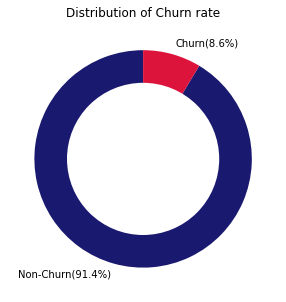

In [52]:
# Here we are plotting a Pie Plot to display ratio between Non-Churn and Churn

plt.figure(figsize=(10,5))

plt.pie(telecom_data.churn.value_counts(),colors = ["midnightblue","crimson"],labels = ["Non-Churn(91.4%)","Churn(8.6%)"], 
        startangle=90)

plt.title("Distribution of Churn rate")
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

The above Pie-Chart shows the contrast between Non-Churn and Churn Customers.

In [53]:
# Function for boxen plots
def plot_boxen(col):
    plt.figure(figsize = (20,15))
    plt.subplot(231)
    sns.boxenplot(y = telecom_data[col+"_6"],x = telecom_data["churn"])
    plt.subplot(232)
    sns.boxenplot(y = telecom_data[col+"_7"],x = telecom_data["churn"])
    plt.subplot(233)
    sns.boxenplot(y = telecom_data[col+"_8"],x = telecom_data["churn"])
    plt.show()

In [54]:
# Function for barplot 
def plot_bar(col):    
    plt.figure(figsize = (20,15))
    plt.subplot(231)
    sns.barplot(data = telecom_data, x = "tenure_range",y = col+"_6", hue = "churn",palette = ["midnightblue","crimson"])
    plt.subplot(232)
    sns.barplot(data = telecom_data, x = "tenure_range",y = col+"_7", hue = "churn",palette = ["midnightblue","crimson"])
    plt.subplot(233)
    sns.barplot(data = telecom_data, x = "tenure_range",y = col+"_8", hue = "churn",palette = ["midnightblue","crimson"])
    plt.show()

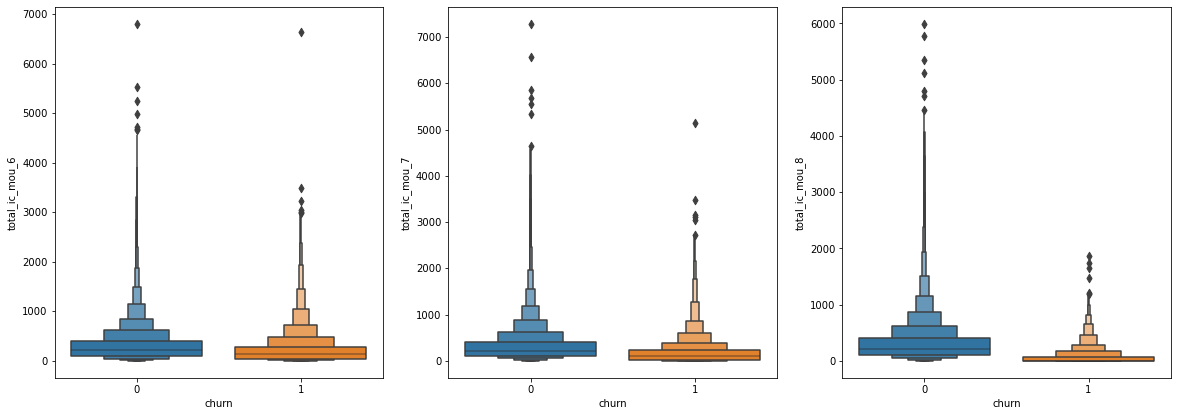

In [55]:
plot_boxen("total_ic_mou")

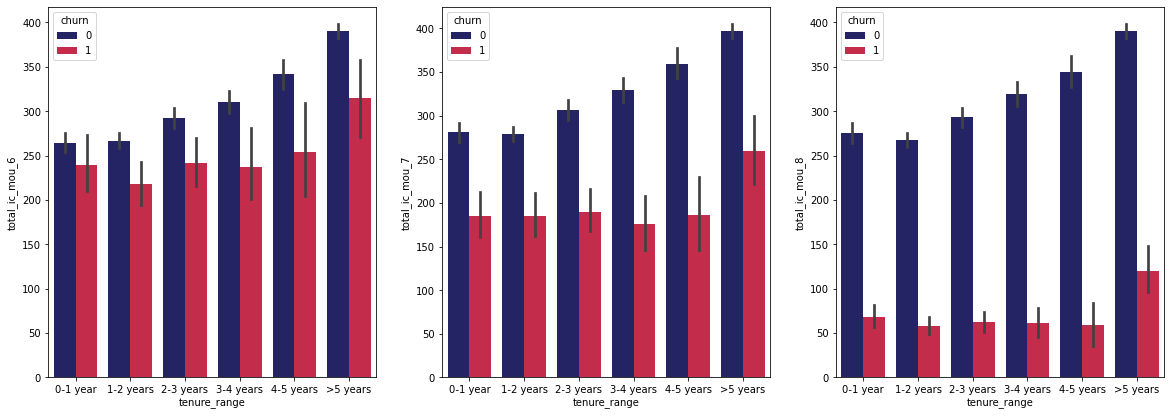

In [56]:
plot_bar("total_ic_mou")

#### Churn rate is observed highest with tenure >5 years with respect to total incoming minutes of usage.

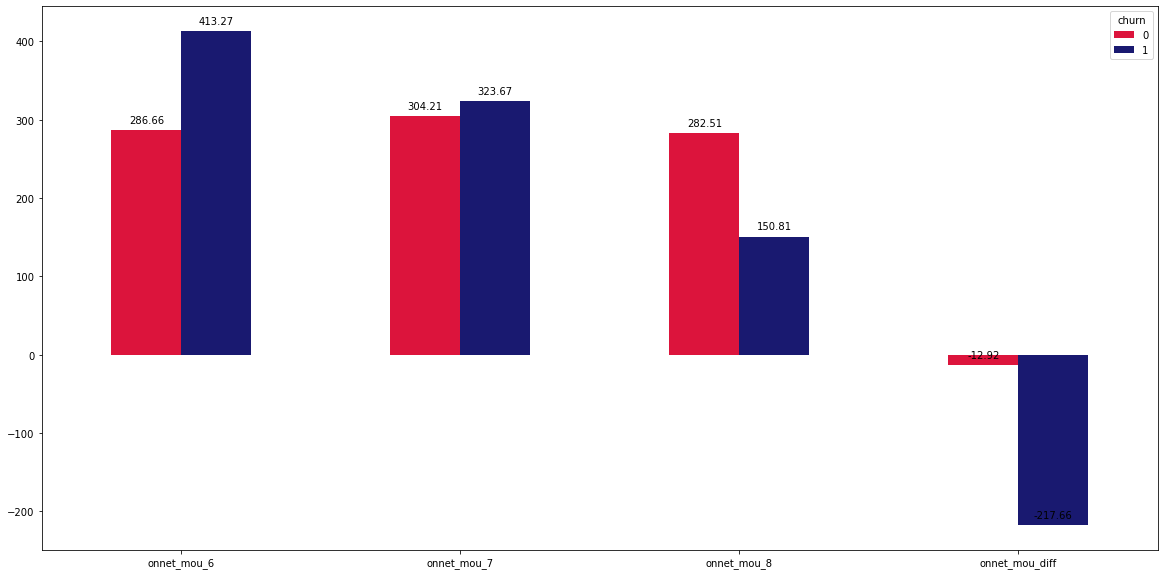

In [57]:
table_pivot = pd.pivot_table(data = telecom_data, values = telecom_data.filter(regex = "^onnet").columns, index = "churn").T
ax  = table_pivot.plot.bar(color = [ "crimson","midnightblue"], figsize = (20,10))
plt.xticks(rotation = 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

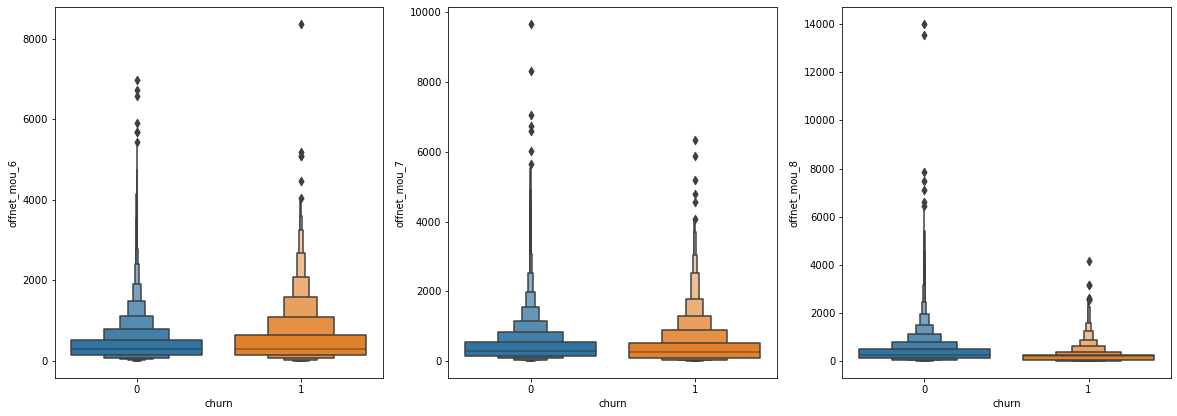

In [58]:
plot_boxen("offnet_mou")

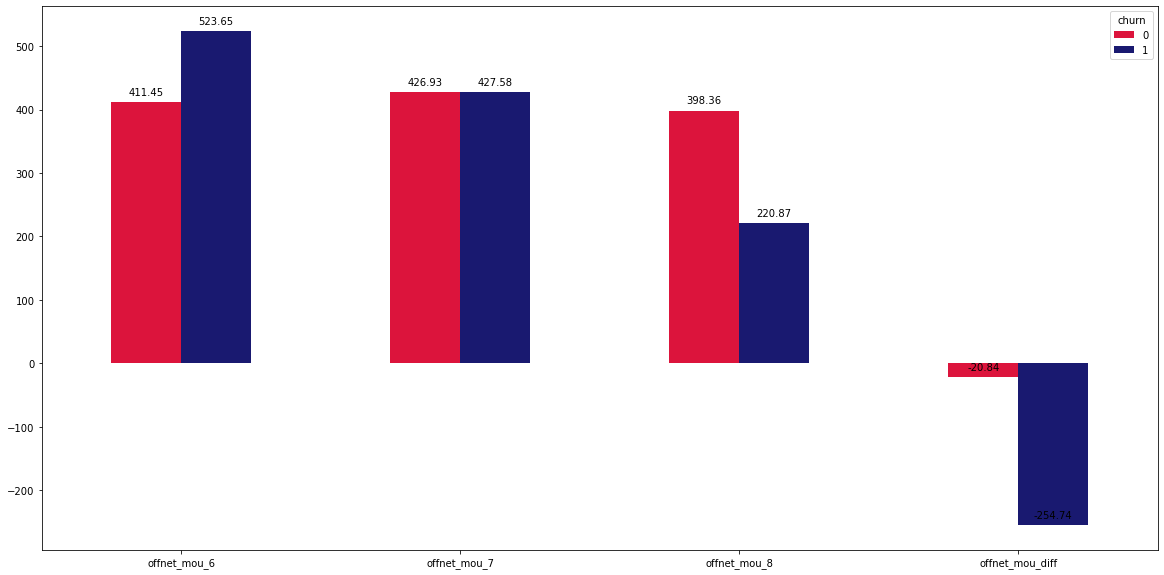

In [59]:
table_pivot = pd.pivot_table(data = telecom_data, values = telecom_data.filter(regex = "^offnet").columns, index = "churn").T
ax = table_pivot.plot.bar(color = [ "crimson","midnightblue"], figsize = (20,10))
plt.xticks(rotation = 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

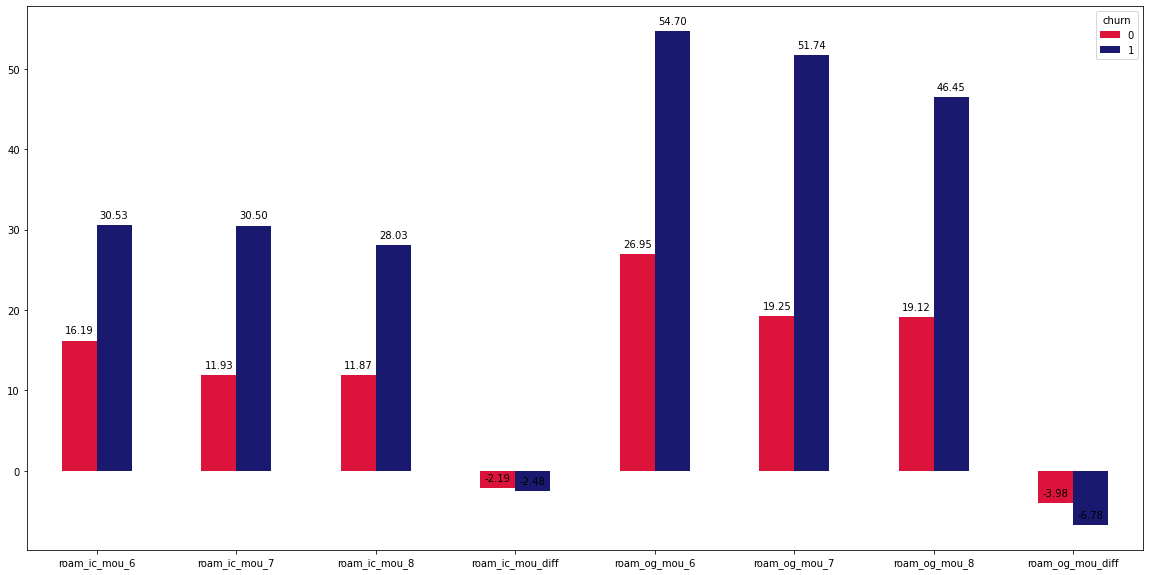

In [60]:
table_pivot = pd.pivot_table(data = telecom_data, values = telecom_data.filter(regex = "^roam").columns, index = "churn").T
ax = table_pivot.plot.bar(color = [ "crimson","midnightblue"], figsize = (20,10))
plt.xticks(rotation = 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

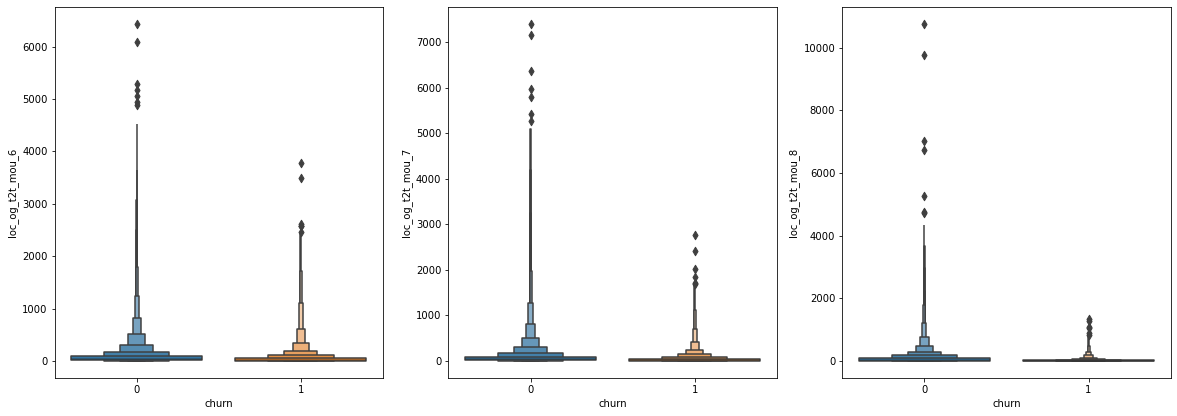

In [61]:
plot_boxen("loc_og_t2t_mou")

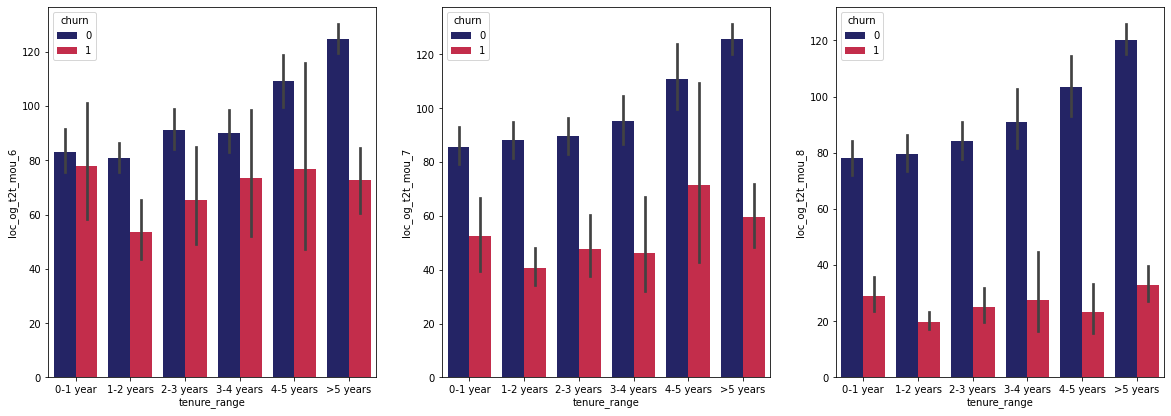

In [62]:
plot_bar("loc_og_t2t_mou")

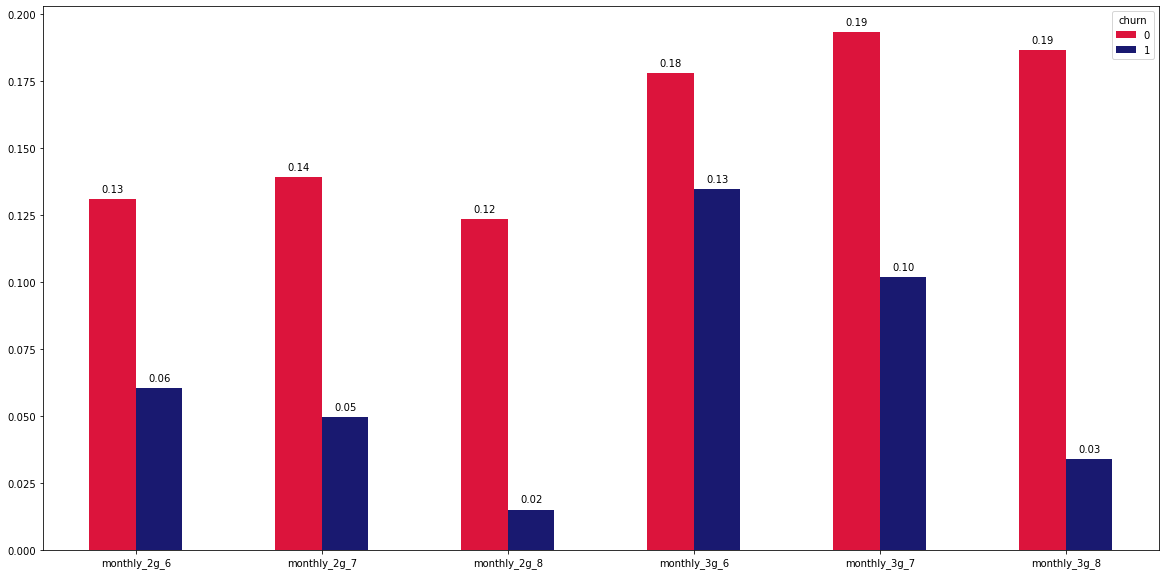

In [63]:
table_pivot = pd.pivot_table(data = telecom_data, values = telecom_data.filter(regex = "^monthly").columns, index = "churn").T
ax = table_pivot.plot.bar(color = [ "crimson","midnightblue"], figsize = (20,10))
plt.xticks(rotation = 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

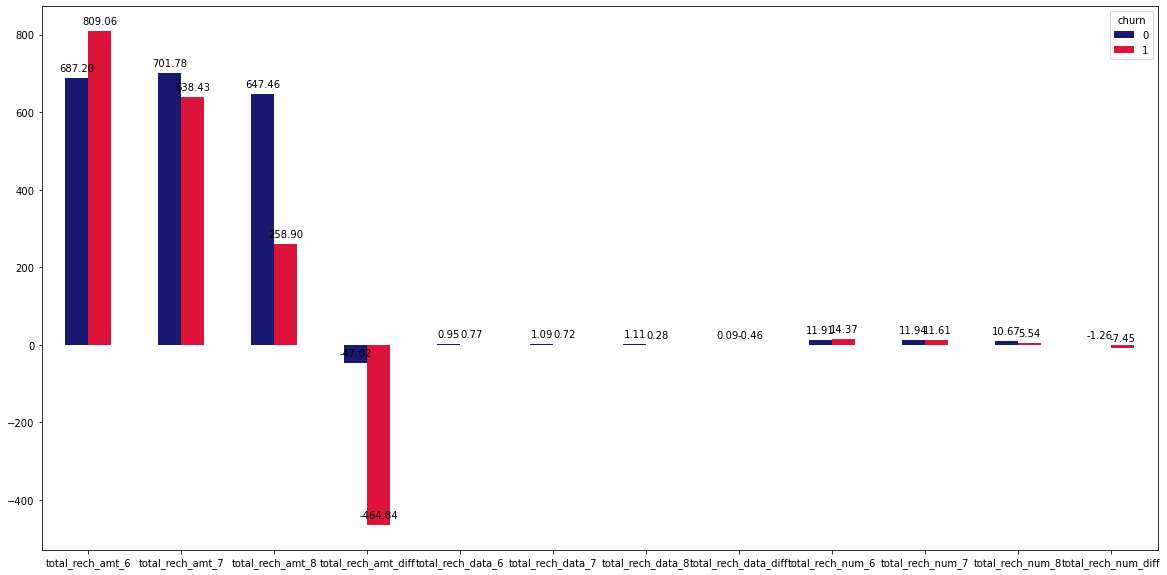

In [64]:
table_pivot = pd.pivot_table(data = telecom_data, values = telecom_data.filter(regex = "^total_rech").columns, index = "churn").T
ax = table_pivot.plot.bar(figsize=(20,10),color = ["midnightblue","crimson"])
for p in ax.patches:
    ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.show()


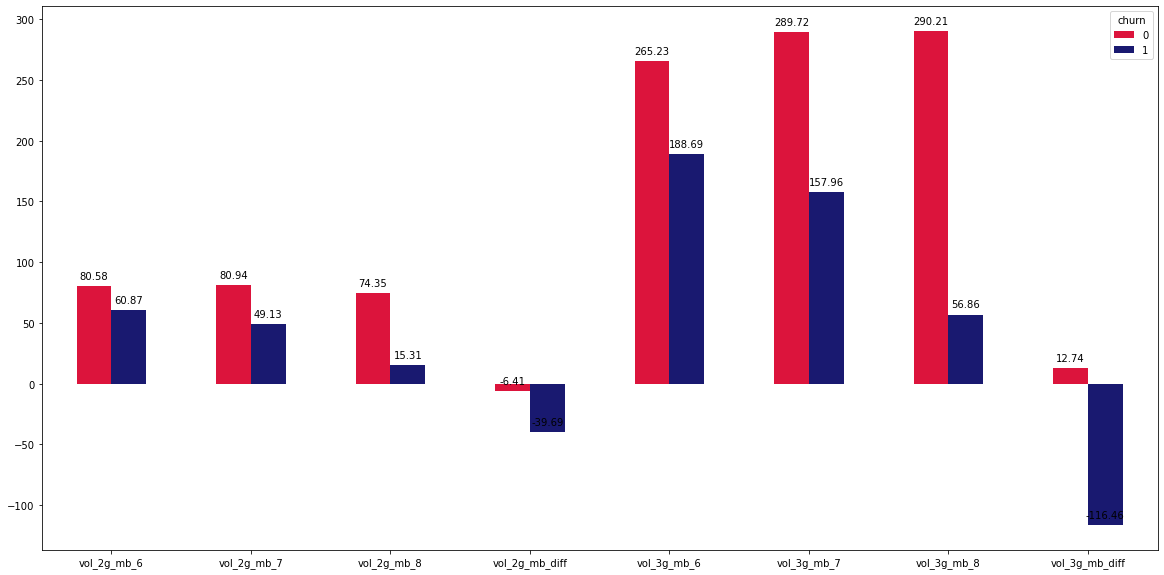

In [65]:
table_pivot = pd.pivot_table(data = telecom_data, values = telecom_data.filter(regex = "^vol").columns, index = "churn").T
ax = table_pivot.plot.bar(color = [ "crimson","midnightblue"], figsize = (20,10))
plt.xticks(rotation = 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [66]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,tenure,tenure_range,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_diff,av_rech_amt_data_diff,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1185.0,27.0,2-3 years,1961.9650,-3.970,-184.385,6.780,19.895,-222.245,9.840,9.92,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.00,0.000,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,910.65,122.16,519.0,10.0,0-1 year,-298.1100,-347.280,48.835,0.000,0.000,

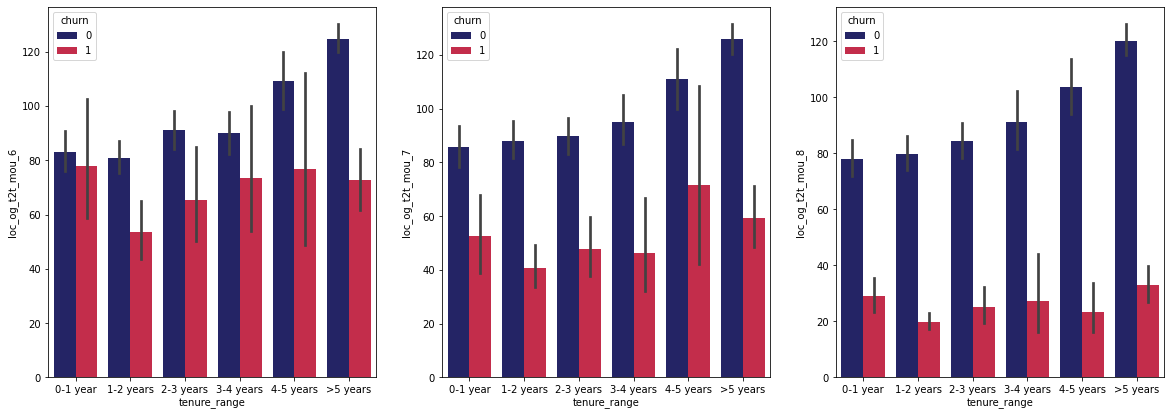

In [67]:
plot_bar("loc_og_t2t_mou")

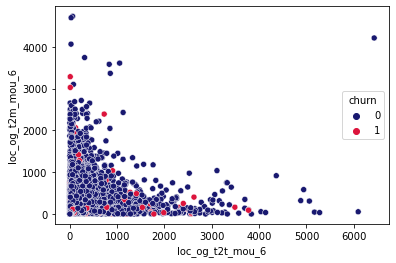

In [68]:
sns.scatterplot(data = telecom_data, x = "loc_og_t2t_mou_6",y = "loc_og_t2m_mou_6", hue = "churn", palette= ["midnightblue", "crimson"] )
plt.show()

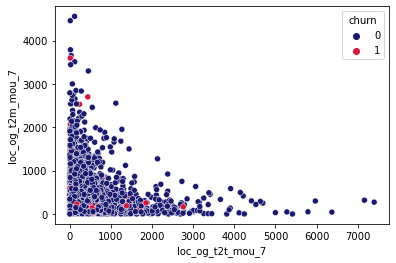

In [69]:
sns.scatterplot(data = telecom_data, x = "loc_og_t2t_mou_7",y = "loc_og_t2m_mou_7", hue = "churn", palette= ["midnightblue", "crimson"] )
plt.show()

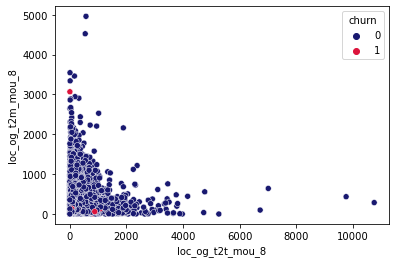

In [70]:
sns.scatterplot(data = telecom_data, x = "loc_og_t2t_mou_8",y = "loc_og_t2m_mou_8", hue = "churn", palette= ["midnightblue", "crimson"] )
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Capping outliers using K-Sigma technique

In [71]:
# Function to handle outliers
def outliers_cap(array, k = 3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [72]:
telecom_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 156 columns):
 #    Column                 Dtype   
---   ------                 -----   
 0    mobile_number          int64   
 1    arpu_6                 float64 
 2    arpu_7                 float64 
 3    arpu_8                 float64 
 4    onnet_mou_6            float64 
 5    onnet_mou_7            float64 
 6    onnet_mou_8            float64 
 7    offnet_mou_6           float64 
 8    offnet_mou_7           float64 
 9    offnet_mou_8           float64 
 10   roam_ic_mou_6          float64 
 11   roam_ic_mou_7          float64 
 12   roam_ic_mou_8          float64 
 13   roam_og_mou_6          float64 
 14   roam_og_mou_7          float64 
 15   roam_og_mou_8          float64 
 16   loc_og_t2t_mou_6       float64 
 17   loc_og_t2t_mou_7       float64 
 18   loc_og_t2t_mou_8       float64 
 19   loc_og_t2m_mou_6       float64 
 20   loc_og_t2m_mou_7       float64 
 21   loc_og_t2m

In [73]:
cols = telecom_data.columns

In [74]:
cols = cols.drop(["mobile_number","tenure_range","churn"])

In [75]:
telecom_data[cols].head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,tenure,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_diff,av_rech_amt_data_diff
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1185.0,27.0,1961.9650,-3.970,-184.385,6.780,19.895,-222.245,9.840,9.92,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.00,0.000,0.0,0.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,910.65,122.16,519.0,10.0,-298.1100,-347.280,48.835,0.000,0.000,-270.095,-38.590,0.00,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.

In [76]:
# Outlier handling of numeric columns
telecom_data[cols] = telecom_data[cols].apply(outliers_cap, axis=0)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Data Preprocessing

- Feature Encoding
- Train - Test Split
- Feature Scaling
- Handling class imbalance using SMOTE
- Principal Component Analysis

Checking NaN's to ensure smooth run of SMOTE

In [77]:
telecom_data.isnull().sum().sum()

0

In [78]:
# Label Encoding categorical column
label_encoder = preprocessing.LabelEncoder()
telecom_data['tenure_range'] = label_encoder.fit_transform(telecom_data['tenure_range'])
telecom_data['tenure_range'].unique()

array([2, 0, 5, 1, 3, 4])

In [79]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,tenure,tenure_range,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_diff,av_rech_amt_data_diff,churn
7,7000701601,1069.180,1349.850,2012.411408,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.940000,626.46,558.04,428.74,0.21,0.0,0.0,2.060000,14.53,31.590000,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2420.051436,695.758778,720.543733,680.943675,0.0,0.0,531.63749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1185.0,27.0,2,970.330462,-3.970,-184.385,6.780,19.895,-222.245,9.840,9.92,4.25,-198.225,-203.515,17.130,23.295000,-0.105,-163.510,2.0,1192.062576,395.0,0.00,0.000,0.0,0.0,1
8,7001524846,378.721,492.223,137.362000,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.750000,103.86,28.49,16.54,0.00,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.000000,90.000000,154.000000,30.000000,50.0,0.0,10.00000,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0

In [80]:
telecom_data.shape

(29979, 156)

In [81]:
# Train - Test Split

X = telecom_data.drop(['churn','mobile_number'], axis = 1)
y = telecom_data[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20985, 154)
(20985, 1)
(8994, 154)
(8994, 1)


In [82]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,tenure,tenure_range,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_diff,av_rech_amt_data_diff
88105,0.000,653.967,985.600,128.48,52.63,53.04,285.99,1319.53,1803.423489,0.00,0.0,0.0,0.00,0.0,0.0,33.34,38.54,37.34,103.53,16.69,37.78,0.38,0.00,0.00,0.0,5.20,0.25,169.56,55.24,75.13,13.69,14.08,15.69,39.44,1297.63,1430.269034,0.0,0.0,0.0,131.39,1311.71,2201.783336,0.0,0.0,0.0,0.26,5.20,5.86,0.0,0.0,0.0,0.00,1372.16,2370.86,29.68,1.66,11.09,95.51,30.29,55.19,2.06,8.84,11.09,153.48,40.81,77.39,1.13,1.89,0.00,7.35,15.89,24.33,0.00,0.00,0.00,15.43,17.79,24.33,0.00,58.61,101.73,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,31.0,23.0,0.0,786.0,1194.0,0.0,110.0,130.0,0.0,10.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,393.0,36.0,2,658.6165,-37.515,1027.505952,0.000,0.000,-37.270,1280.790322,0.0,3.13,1495.363671,-19.755,7.720,0.00,0.00,72.425,7.5,801.0,75.0,0.000,0.000,0.0,0.0
34588,343.639,516.521,160.704,46.49,37.59,17.11,94.78,97.38,94.440000,0.00,0.0,0.0,0.00,0.0,0.0,31.74,35.38,14.64,90.01,91.83,91.86,4.76,5.54,2.36,0.0,0.00,0.00,126.53,132.76,108.88,14.74,2.21,2.46,0.00,0.00,0.210000,0.0,0.0,0.0,14.74,2.21,2.680000,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,141.28,134.98,111.56,19.51,15.69,3.44,69.14,43.19,59.51,14.64,14.79,0.88,103.31,73.69,63.84,6.64,1.06,4.96,1.66,0.00,0.33,0.00,0.00,0.00,8.31,1.06,5.29,111.63,76.23,69.14,0.00,0.0,0.0,0.00,1.46,0.00,0.00,0.00,0.00,9.0,13.0,7.0,399.0,570.0,210.0,252.0,252.0,50.0,7.0,23.0,50.0,1.0,2.0,1.0,252.0,406.0,154.0,184.86,80.42,7.53,41.15,2395.55,461.95,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,137.590000,1359.881079,38.36,484.5,33.0,2,-269.3760,-24.930,-1.640000,0.000,0.000,-20.765,-5.795000,0.0,0.00,-26.570000,-24.660,0.605,-0.73,0.00,-

In [83]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

#### Feature Scaling using StandardScaler()

In [84]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [85]:
X_test[num_col] = scaler.transform(X_test[num_col])

In [86]:
y_train.head()

,churn
88105,0
34588,0
16623,0
54904,0
33555,0


In [87]:
X_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20985 entries, 88105 to 18642
Data columns (total 154 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    arpu_6                 float64
 1    arpu_7                 float64
 2    arpu_8                 float64
 3    onnet_mou_6            float64
 4    onnet_mou_7            float64
 5    onnet_mou_8            float64
 6    offnet_mou_6           float64
 7    offnet_mou_7           float64
 8    offnet_mou_8           float64
 9    roam_ic_mou_6          float64
 10   roam_ic_mou_7          float64
 11   roam_ic_mou_8          float64
 12   roam_og_mou_6          float64
 13   roam_og_mou_7          float64
 14   roam_og_mou_8          float64
 15   loc_og_t2t_mou_6       float64
 16   loc_og_t2t_mou_7       float64
 17   loc_og_t2t_mou_8       float64
 18   loc_og_t2m_mou_6       float64
 19   loc_og_t2m_mou_7       float64
 20   loc_og_t2m_mou_8       float64
 21   loc_og_t2f_mou_6       float6

#### SMOTE

In [88]:
smo = SMOTE(random_state = 100)
X_train_sm,y_train_sm = smo.fit_resample(X_train,y_train)

In [89]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38422, 154)
Dimension of y_train_sm Shape: (38422, 1)


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Principal Component Analysis

Now, let's move ahead and kickstart PCA or Principal Component Analysis for our model and it is a popular unsupervised learning technique for reducing the dimensionality of data.

In [90]:
from sklearn.decomposition import PCA

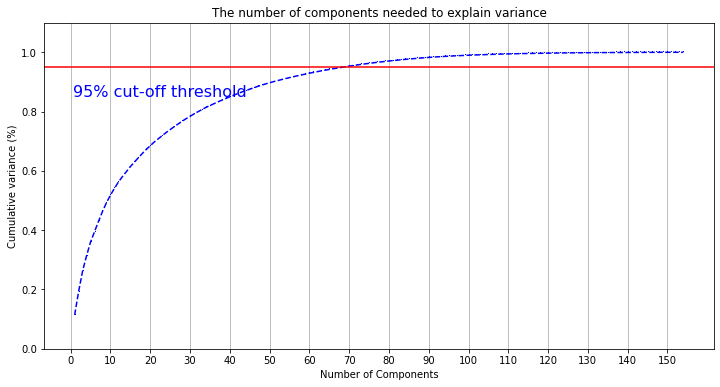

In [91]:
pca = PCA(random_state=100)

pca.fit(X_train_sm)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 155, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker=',', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 160, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')


plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'blue', fontsize=16)


ax.grid(axis='x')
plt.show()

In [92]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0      0.114211
1      0.192907
2      0.262289
3      0.314053
4      0.360176
5      0.395449
6      0.429726
7      0.463216
8      0.492754
9      0.518365
10     0.541033
11     0.562345
12     0.580528
13     0.597619
14     0.614306
15     0.629343
16     0.644156
17     0.658549
18     0.672351
19     0.684962
20     0.697265
21     0.708173
22     0.718878
23     0.729347
24     0.739308
25     0.748949
26     0.758253
27     0.767275
28     0.775968
29     0.784180
30     0.792004
31     0.799524
32     0.806991
33     0.814102
34     0.820440
35     0.826697
36     0.832709
37     0.838550
38     0.844367
39     0.849922
40     0.855409
41     0.860827
42     0.865935
43     0.870799
44     0.875627
45     0.880300
46     0.884899
47     0.889310
48     0.893380
49     0.897255
50     0.901049
51     0.904568
52     0.908031
53     0.911348
54     0.914583
55     0.917736
56     0.920746
57     0.923719
58     0.926659
59     0.929444
60     0.932197
61     0.934829
62     0

**Our Inference**-

90% variance is explained by 50 components

In [93]:
pca = PCA(n_components = 50,random_state = 100)

pca.fit(X_train_sm)

PCA(n_components=50, random_state=100)

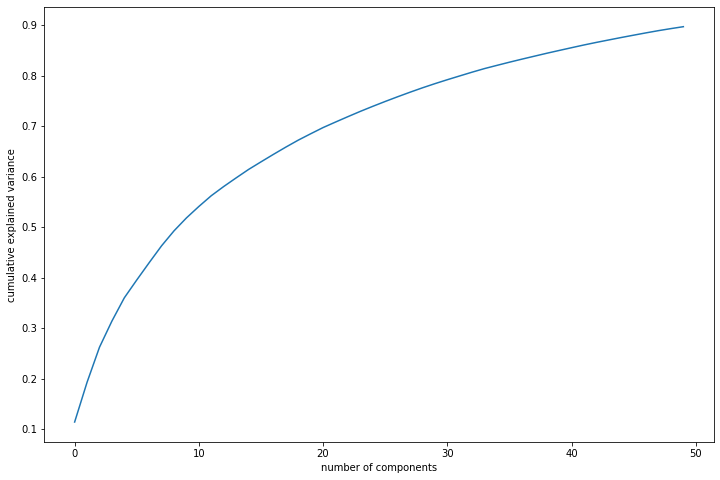

In [94]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [95]:
X_train_sm_pca = pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca = pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38422, 50)
Dimension of X_test_pca:  (8994, 50)


In [96]:
consolidate_summary = pd.DataFrame()

def header(string):
    display(Markdown("------ "))
    display(Markdown("### "+string))

def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def print_model_metrics(y,y_pred,X):
    print(metrics.classification_report(y,y_pred))
    print("-----------------------------------------------------------")
    sensitivity, specificity, _ = sensitivity_specificity_support(y, y_pred, average='binary')
    accuracy = metrics.accuracy_score(y, y_pred)
    y_pred_prob = logreg.predict_proba(X)[:, 1]
    auc_roc_metric = metrics.roc_auc_score(y, y_pred_prob)
    print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2),"\nROC-AUC score: \t", round(auc_roc_metric,2))

def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Logistic Regression with PCA

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [98]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

params = {"C" : [0.1, 0.5, 1, 10, 100, 1000]}

logreg_model_cv = GridSearchCV(estimator = LogisticRegression(class_weight = "balanced"), param_grid = params, scoring = "recall", cv = folds, verbose = 1, return_train_score = True)

logreg_model_cv.fit(X_train_sm_pca, y_train_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.1, 0.5, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [99]:
logreg_model_cv.best_params_

{'C': 0.1}

In [100]:
logreg_model_cv.best_score_

0.8553954315417351

In [101]:
logreg = LogisticRegression(C = 0.1, class_weight = "balanced")
logreg.fit(X_train_sm_pca, y_train_sm)

LogisticRegression(C=0.1, class_weight='balanced')

In [102]:
# Getting the predicted values on the train set
y_train_sm_pred = logreg.predict(X_train_sm_pca)
y_train_sm_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [103]:
confusion = metrics.confusion_matrix(y_train_sm, y_train_sm_pred)
print(confusion)

[[15922  3289]
 [ 2758 16453]]


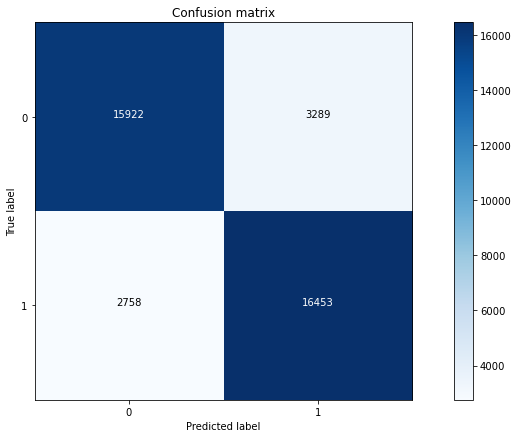

In [104]:
plot_confusion_matrix(confusion)

In [105]:
print_model_metrics(y_train_sm, y_train_sm_pred,X_train_sm_pca)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     19211
           1       0.83      0.86      0.84     19211

    accuracy                           0.84     38422
   macro avg       0.84      0.84      0.84     38422
weighted avg       0.84      0.84      0.84     38422

-----------------------------------------------------------
Sensitivity: 	 0.86 
Specificity: 	 0.83 
Accuracy: 	 0.84 
ROC-AUC score: 	 0.91


In [106]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,tenure,tenure_range,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_diff,av_rech_amt_data_diff
76438,0.952872,0.650569,1.314225,2.357131,2.531612,1.968549,0.856195,0.978043,1.196195,-0.312595,-0.272415,-0.272932,-0.332952,-0.304262,-0.293542,5.035786,5.256660,5.307693,2.621963,2.910570,3.224502,-0.450158,-0.454411,-0.022073,-0.343541,-0.34098,-0.348330,3.754216,3.775722,3.760939,-0.536954,-0.539157,-0.496315,-0.448429,-0.447144,-0.436924,-0.253386,-0.245793,0.381479,-0.643308,-0.646937,-0.594043,-0.126386,-0.126897,-0.114318,-0.403831,0.163818,-0.205681,1.258206,-0.049077,-0.050352,2.140443,2.336194,2.025678,5.152657,3.434711,5.243205,0.889241,2.277379,1.739740,-0.386883,-0.009926,1.722873,2.955267,2.813061,3.679691,-0.391065,-0.388557,-0.380049,0.385498,0.406047,0.397668,-0.269307,-0.270127,-0.264358,0.047386,0.054059,0.069084,2.459078,2.303258,3.024854,-0.443232,-0.200138,-0.275093,-0.264577,-0.271205,-0.258612,-0.215304,-0.227375,-0.220681,0.135157,-0.316080,0.118404,0.877052,0.548566,1.539490,-0.419166,-0.432220,-0.206915,0.105685,0.090178,0.367636,-0.546762,-0.545957,-0.550551,-0.563592,-0.576169,-0.565858,-0.364882,-0.360925,-0.344744,-0.396915,-0.413382,-0.405033,-0.352993,-0.361166,-0.340405,-0.368162,-0.375759,-0.396673,-0.344256,-0.346437,-0.342026,-0.242564,-0.233327,-0.220026,-0.401973,-0.399184,-0.384031,0.836155,-0.709079,1,0.754383,-0.885914,0.319511,0.063941,0.078476,-0.998084,0.115027,0.038145,-0.103798,-0.282918,1.296102,0.024420,0.013131,0.121635,1.042687,0.289205,1.101509,0.283744,0.068223,-0.002571,-0.022946,0.031827
72869,-0.065495,-0.203480,0.055164,-0.239662,-0.385723,-0.280526,-0.165928,0.141084,0.561142,0.719747,-0.272415,-0.272932,0.339362,-0.304262,-0.293542,0.595381,0.381450,0.551877,0.696680,1.412632,2.161951,-0.095293,0.055295,-0.212334,-0.343

In [107]:
y_test_pred = logreg.predict(X_test_pca)
print("The first ten probability value of the prediction are:",y_test_pred[:10])

The first ten probability value of the prediction are: [0 0 0 1 1 1 1 1 0 0]


In [108]:
print_model_metrics(y_test, y_test_pred,X_test_pca)

              precision    recall  f1-score   support

           0       0.98      0.83      0.89      8179
           1       0.31      0.80      0.45       815

    accuracy                           0.82      8994
   macro avg       0.65      0.81      0.67      8994
weighted avg       0.92      0.82      0.85      8994

-----------------------------------------------------------
Sensitivity: 	 0.8 
Specificity: 	 0.83 
Accuracy: 	 0.82 
ROC-AUC score: 	 0.88


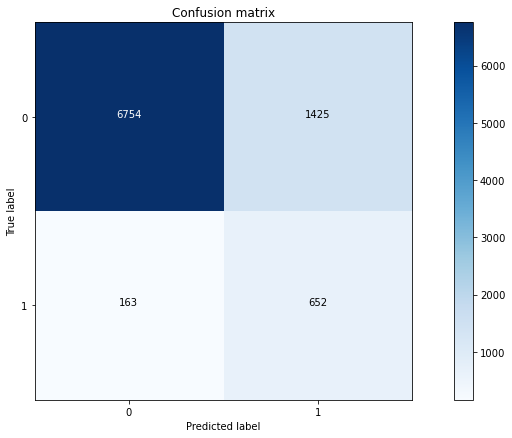

In [109]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(confusion2_test)

#### Logistic Regression Model with PCA
- Train dataset results
        Sensitivity  : 	 0.86 
        Specificity  : 	 0.83 
        Accuracy     : 	 0.84 
        ROC-AUC score: 	 0.91
        
- Test dataset results
        Sensitivity  : 	 0.8 
        Specificity  : 	 0.83 
        Accuracy     : 	 0.82 
        ROC-AUC score: 	 0.88

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Logistic Regression without PCA

In [110]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

params = {"C" : [0.1, 0.5, 1, 10, 100, 1000]}

logreg_model_cv = GridSearchCV(estimator = LogisticRegression(), param_grid = params, scoring = "recall", cv = folds, verbose = 1, return_train_score = True)

logreg_model_cv.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [111]:
logreg_model_cv.best_params_

{'C': 0.1}

In [112]:
logreg_model_cv.best_score_

0.8730414473444487

In [113]:
logreg = LogisticRegression(C = 0.1, class_weight = "balanced")

logreg.fit(X_train_sm, y_train_sm)

# making the predictions
y_train_pred = logreg.predict(X_train_sm)

y_pred = logreg.predict(X_test)

In [114]:
y_train_pred.shape

(38422,)

In [115]:
y_train_sm.shape

(38422, 1)

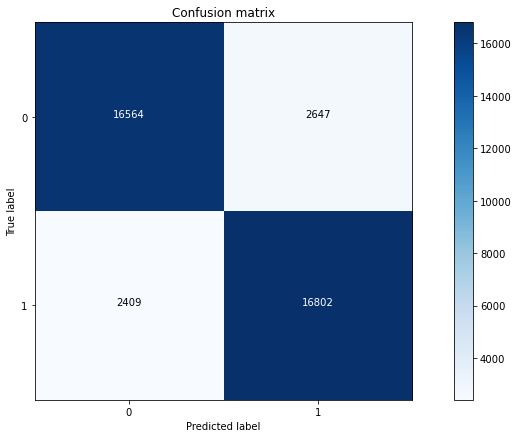

In [116]:
cmatrix = confusion_matrix(y_train_sm, y_train_pred)
plot_confusion_matrix(cmatrix)

In [117]:
print_model_metrics(y_train_sm, y_train_pred,X_train_sm)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     19211
           1       0.86      0.87      0.87     19211

    accuracy                           0.87     38422
   macro avg       0.87      0.87      0.87     38422
weighted avg       0.87      0.87      0.87     38422

-----------------------------------------------------------
Sensitivity: 	 0.87 
Specificity: 	 0.86 
Accuracy: 	 0.87 
ROC-AUC score: 	 0.94


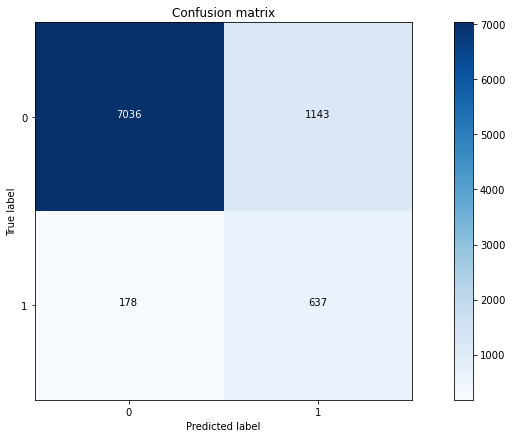

In [118]:
cmatrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cmatrix)

In [119]:
print_model_metrics(y_test,y_pred,X_test)

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8179
           1       0.36      0.78      0.49       815

    accuracy                           0.85      8994
   macro avg       0.67      0.82      0.70      8994
weighted avg       0.92      0.85      0.88      8994

-----------------------------------------------------------
Sensitivity: 	 0.78 
Specificity: 	 0.86 
Accuracy: 	 0.85 
ROC-AUC score: 	 0.9


#### Logistic regression model without PCA
- Train dataset results
        Sensitivity  : 	 0.87 
        Specificity  : 	 0.86 
        Accuracy     : 	 0.87 
        ROC-AUC score: 	 0.94
        
- Test dataset results
        Sensitivity  : 	 0.78 
        Specificity  : 	 0.86 
        Accuracy     : 	 0.85 
        ROC-AUC score: 	 0.9  

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Random Forest Classifier without PCA

In [120]:
rf_clf = RandomForestClassifier()

rf_params = { "n_estimators" : [10, 50, 100, 130],
              "criterion" : ["gini", "entropy"],
              "max_depth" : range(2,4,1),
              "max_features" : ["auto", "log2"],
}

grid_search = RandomizedSearchCV(rf_clf, rf_params, cv = 5, verbose = 3)
grid_search.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.826 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.869 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.880 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.863 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.846 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.853 total time=   9.1s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.863 total time=   9.1s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.877 total time=   8.8s
[CV 4/5] END criterion=gini, max_depth=3,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 4),
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [10, 50, 100, 130]},
                   verbose=3)

In [121]:
grid_search.best_score_

0.8686174958349943

In [122]:
grid_search.best_params_

{'n_estimators': 130,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini'}

In [123]:
rf_clf = RandomForestClassifier(criterion = "entropy", max_depth = 4, max_features = "auto", n_estimators = 100)
rf_clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='auto')

In [124]:
y_train_pred = rf_clf.predict(X_train_sm)
y_test_pred = rf_clf.predict(X_test)

In [125]:
print(metrics.classification_report(y_train_sm,y_train_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_sm,y_train_pred, average='binary')
accuracy = metrics.accuracy_score(y_train_sm,y_train_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     19211
           1       0.90      0.86      0.88     19211

    accuracy                           0.88     38422
   macro avg       0.88      0.88      0.88     38422
weighted avg       0.88      0.88      0.88     38422

-----------------------------------------------------------
Sensitivity: 	 0.86 
Specificity: 	 0.9 
Accuracy: 	 0.88


In [126]:
print(metrics.classification_report(y_test,y_test_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8179
           1       0.42      0.78      0.55       815

    accuracy                           0.88      8994
   macro avg       0.70      0.84      0.74      8994
weighted avg       0.93      0.88      0.90      8994

-----------------------------------------------------------
Sensitivity: 	 0.78 
Specificity: 	 0.89 
Accuracy: 	 0.88


#### Random Forest Classifier without PCA
- Train Dataset Results
        Sensitivity  : 	 0.87 
        Specificity  : 	 0.9 
        Accuracy     : 	 0.88 
        
- Test Dataset Results
        Sensitivity  : 	 0.78 
        Specificity  : 	 0.9 
        Accuracy     : 	 0.88 

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Random Forest Classifier with PCA

In [128]:
rf_clf_pca = RandomForestClassifier()

rf_params = { "n_estimators" : [10, 50, 100, 130],
              "criterion" : ["gini", "entropy"],
              "max_depth" : range(2,4,1),
              "max_features" : ["auto", "log2"],
}

grid_search = RandomizedSearchCV(rf_clf_pca, rf_params, cv = 5, verbose = 3)
grid_search.fit(X_train_sm_pca, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=10;, score=0.785 total time=   1.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=10;, score=0.795 total time=   1.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=10;, score=0.810 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=10;, score=0.793 total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=10;, score=0.809 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.778 total time=   5.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.796 total time=   5.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100;, score=0.805 total time=   5.3s
[CV 4/5] END criterion=entropy, 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 4),
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [10, 50, 100, 130]},
                   verbose=3)

In [129]:
grid_search.best_score_

0.8065694882809152

In [130]:
grid_search.best_params_

{'n_estimators': 130,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini'}

In [131]:
rf_clf_pca = RandomForestClassifier(criterion = "entropy",max_depth = 5,n_estimators = 130, oob_score = True,class_weight="balanced")
rf_clf_pca.fit(X_train_sm_pca, y_train_sm)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, n_estimators=130, oob_score=True)

In [132]:
y_train_pred = rf_clf_pca.predict(X_train_sm_pca)
y_test_pred = rf_clf_pca.predict(X_test_pca)

In [133]:
print(metrics.classification_report(y_train_sm,y_train_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_sm,y_train_pred, average='binary')
accuracy = metrics.accuracy_score(y_train_sm,y_train_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     19211
           1       0.84      0.84      0.84     19211

    accuracy                           0.84     38422
   macro avg       0.84      0.84      0.84     38422
weighted avg       0.84      0.84      0.84     38422

-----------------------------------------------------------
Sensitivity: 	 0.84 
Specificity: 	 0.83 
Accuracy: 	 0.84


In [134]:
print(metrics.classification_report(y_test,y_test_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8179
           1       0.31      0.74      0.44       815

    accuracy                           0.83      8994
   macro avg       0.64      0.79      0.67      8994
weighted avg       0.91      0.83      0.86      8994

-----------------------------------------------------------
Sensitivity: 	 0.74 
Specificity: 	 0.84 
Accuracy: 	 0.83


#### Random Forest Classifier with PCA
- Train Dataset Results
        Sensitivity  : 	 0.84 
        Specificity  : 	 0.82
        Accuracy     : 	 0.83 
        
- Test Dataset Results
        Sensitivity  : 	 0.75 
        Specificity  : 	 0.82
        Accuracy     : 	 0.82

In [135]:
rf_clf_pca.oob_score_

0.8322835875279787

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# XGBoost Classifier Model without PCA

In [136]:
xgb_cfl = XGBClassifier()

params = {
        'n_estimators' : [50,100,130], 
        'learning_rate' : [0.01,0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'gamma': [0.1, 0.5, 1],
        'max_depth': [5, 10, 15]
        }

folds = 5

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params,scoring='recall', n_jobs=-1, cv=3, verbose=1, random_state=42)

random_search.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[00:40:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_jobs=-1,
                   param_distributions={'gamma': [0.1, 0.5, 1],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [5, 10, 15],
                                        'n_estimators': [50, 100, 130],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='recall', verbose=1)

In [137]:
grid_search.best_params_

{'n_estimators': 130,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini'}

In [138]:
grid_search.best_score_

0.8065694882809152

In [139]:
xgb_cfl = XGBClassifier(learning_rate = 0.0001,max_depth = 8,n_estimators = 100,objective = "binary:logistic")
xgb_cfl.fit(X_train_sm, y_train_sm)

[00:41:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.0001,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
y_train_pred = xgb_cfl.predict(X_train_sm)
y_test_pred = xgb_cfl.predict(X_test)

In [141]:
print(metrics.classification_report(y_train_sm,y_train_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_sm,y_train_pred, average='binary')
accuracy = metrics.accuracy_score(y_train_sm,y_train_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     19211
           1       0.93      0.94      0.93     19211

    accuracy                           0.93     38422
   macro avg       0.93      0.93      0.93     38422
weighted avg       0.93      0.93      0.93     38422

-----------------------------------------------------------
Sensitivity: 	 0.94 
Specificity: 	 0.93 
Accuracy: 	 0.93


In [142]:
print(metrics.classification_report(y_test,y_test_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8179
           1       0.44      0.74      0.55       815

    accuracy                           0.89      8994
   macro avg       0.71      0.82      0.75      8994
weighted avg       0.92      0.89      0.90      8994

-----------------------------------------------------------
Sensitivity: 	 0.74 
Specificity: 	 0.91 
Accuracy: 	 0.89


#### XGBoost Classifier Model without PCA
- Train Dataset Results
        Sensitivity  : 	 0.94 
        Specificity  : 	 0.93
        Accuracy     : 	 0.93
        
- Test Dataset Results
        Sensitivity  : 	 0.74 
        Specificity  : 	 0.91 
        Accuracy     : 	 0.89

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# XGBoost Classifier Model with PCA

In [143]:
xgb_cfl_pca = XGBClassifier(learning_rate = 0.0001,max_depth = 8,n_estimators = 100,objective = "binary:logistic")
xgb_cfl_pca.fit(X_train_sm_pca, y_train_sm)

[00:41:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.0001,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [144]:
y_train_pred = xgb_cfl_pca.predict(X_train_sm_pca)
y_test_pred = xgb_cfl_pca.predict(X_test_pca)

In [145]:
print(metrics.classification_report(y_train_sm,y_train_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_sm,y_train_pred, average='binary')
accuracy = metrics.accuracy_score(y_train_sm,y_train_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     19211
           1       0.88      0.88      0.88     19211

    accuracy                           0.88     38422
   macro avg       0.88      0.88      0.88     38422
weighted avg       0.88      0.88      0.88     38422

-----------------------------------------------------------
Sensitivity: 	 0.88 
Specificity: 	 0.88 
Accuracy: 	 0.88


In [146]:
print(metrics.classification_report(y_test,y_test_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8179
           1       0.33      0.72      0.45       815

    accuracy                           0.84      8994
   macro avg       0.65      0.79      0.68      8994
weighted avg       0.91      0.84      0.87      8994

-----------------------------------------------------------
Sensitivity: 	 0.72 
Specificity: 	 0.85 
Accuracy: 	 0.84


#### XGBoost Classifier Model with PCA
- Train Dataset Results
        Sensitivity  : 	 0.88 
        Specificity  : 	 0.88
        Accuracy     : 	 0.88
        
- Test Dataset Results
        Sensitivity  : 	 0.72 
        Specificity  : 	 0.85 
        Accuracy     : 	 0.84

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Decision Tree Classifier without PCA

In [147]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [148]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [149]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [150]:
grid_search.best_score_

0.9086975203060575

In [151]:
dtree = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 50, min_samples_split = 40, class_weight = "balanced")
dtree.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=50, min_samples_split=40)

In [152]:
y_train_pred = dtree.predict(X_train_sm)
y_test_pred = dtree.predict(X_test)

In [153]:
print(metrics.classification_report(y_train_sm,y_train_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_sm,y_train_pred, average='binary')
accuracy = metrics.accuracy_score(y_train_sm,y_train_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     19211
           1       0.85      0.89      0.87     19211

    accuracy                           0.87     38422
   macro avg       0.87      0.87      0.87     38422
weighted avg       0.87      0.87      0.87     38422

-----------------------------------------------------------
Sensitivity: 	 0.89 
Specificity: 	 0.85 
Accuracy: 	 0.87


In [154]:
print(metrics.classification_report(y_test,y_test_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8179
           1       0.35      0.80      0.49       815

    accuracy                           0.85      8994
   macro avg       0.66      0.83      0.70      8994
weighted avg       0.92      0.85      0.87      8994

-----------------------------------------------------------
Sensitivity: 	 0.8 
Specificity: 	 0.85 
Accuracy: 	 0.85


#### Decision Tree Classifier without PCA
- Train Dataset Results
        Sensitivity  : 	 0.89
        Specificity  : 	 0.85
        Accuracy     : 	 0.87
        
- Test Dataset Results
        Sensitivity  : 	 0.8
        Specificity  : 	 0.85
        Accuracy     : 	 0.85

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Decision Tree Classifier with PCA

In [155]:
dtree_pca = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 50, min_samples_split = 40, class_weight = "balanced")
dtree_pca.fit(X_train_sm_pca, y_train_sm)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=50, min_samples_split=40)

In [156]:
y_train_pred = dtree_pca.predict(X_train_sm_pca)
y_test_pred = dtree_pca.predict(X_test_pca)

In [157]:
print(metrics.classification_report(y_train_sm,y_train_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_sm,y_train_pred, average='binary')
accuracy = metrics.accuracy_score(y_train_sm,y_train_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     19211
           1       0.84      0.87      0.85     19211

    accuracy                           0.85     38422
   macro avg       0.85      0.85      0.85     38422
weighted avg       0.85      0.85      0.85     38422

-----------------------------------------------------------
Sensitivity: 	 0.87 
Specificity: 	 0.84 
Accuracy: 	 0.85


In [158]:
print(metrics.classification_report(y_test,y_test_pred))
print("-----------------------------------------------------------")
sensitivity, specificity, _ = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Sensitivity: \t", round(sensitivity, 2),"\nSpecificity: \t", round(specificity, 2),"\nAccuracy: \t",round(accuracy,2))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8179
           1       0.30      0.77      0.43       815

    accuracy                           0.81      8994
   macro avg       0.63      0.79      0.66      8994
weighted avg       0.91      0.81      0.85      8994

-----------------------------------------------------------
Sensitivity: 	 0.77 
Specificity: 	 0.82 
Accuracy: 	 0.81


#### Decision Tree Classifier with PCA
- Train Dataset Results
        Sensitivity  : 	 0.87
        Specificity  : 	 0.84
        Accuracy     : 	 0.85
        
- Test Dataset Results
        Sensitivity  : 	 0.76
        Specificity  : 	 0.82
        Accuracy     : 	 0.81

**Our Inference**-
##### After building different models on the dataset, Logistic Regression and Decision Tree Classifier seems to perform well on the dataset with Accuracy approximately 83% and Sensitivity around 80% in Logistic Regression model with PCA.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Important Features

Now, let's move ahead and work on extracting Important Features from different models which can help us in generating the useful features for our analysis.

### Important features from Random Forest Classifier Model

Let's us start with Random Forest Classifier Model to find Important Features.

Sum of importance= 100.00000000000001


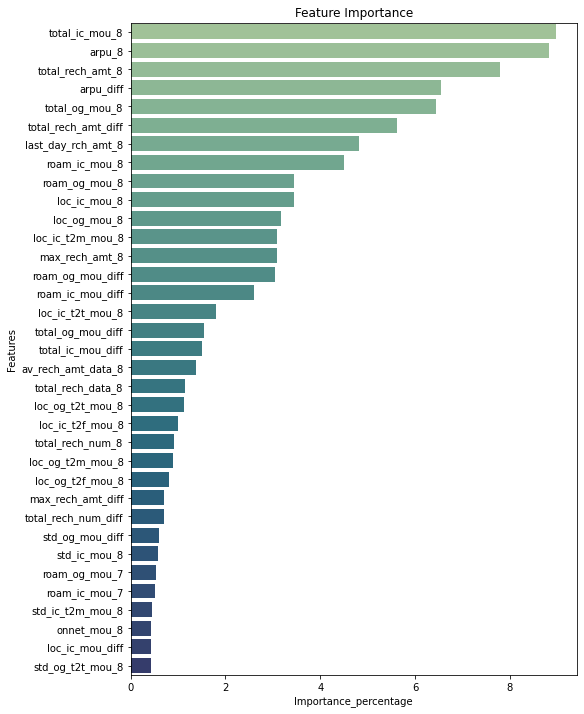

In [159]:
# Here we are finding Important Features using Random Forest Classifier Model

features = X_train_sm.columns

# feature_importance
importance = rf_clf.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'Features': features, 'Importance_percentage': importance*100})
feature_importance = feature_importance[['Features', 'Importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('Importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.Importance_percentage.sum())

plt.figure(figsize=(8, 12))
sns.barplot(x=feature_importance.Importance_percentage, 
            y='Features', 
            data=feature_importance[feature_importance["Importance_percentage"] > 0.4].sort_values('Importance_percentage', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.title('Feature Importance')
plt.show()

In [160]:
feature_importance.head(20)

,Features,Importance_percentage
0,total_ic_mou_8,8.963928
1,arpu_8,8.820790
2,total_rech_amt_8,7.785519
3,arpu_diff,6.540253
4,total_og_mou_8,6.429231
5,total_rech_amt_diff,5.621422
6,last_day_rch_amt_8,4.808650
7,roam_ic_mou_8,4.489626
8,roam_og_mou_8,3.453117
9,loc_ic_mou_8,3.445655


### Important Features from XGBClassifier Model

Now, let's use XGBClassifier Model to generate Important Features.

Sum of importance= 100.00001


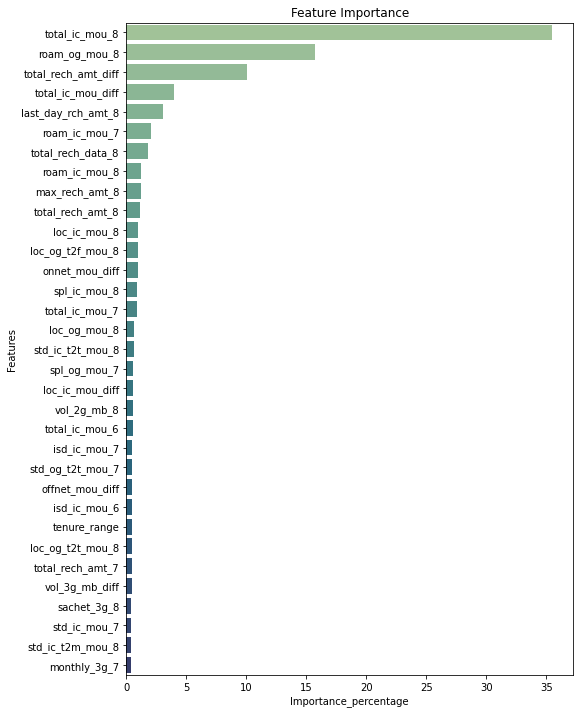

In [161]:
# Features
features = X_train_sm.columns

# feature_importance
importance = xgb_cfl.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'Features': features, 'Importance_percentage': importance*100})
feature_importance = feature_importance[['Features', 'Importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('Importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.Importance_percentage.sum())

plt.figure(figsize=(8, 12))
sns.barplot(x=feature_importance.Importance_percentage, 
            y='Features', 
            data=feature_importance[feature_importance["Importance_percentage"] > 0.4].sort_values('Importance_percentage', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.title('Feature Importance')
plt.show()

In [162]:
feature_importance.head(20)

,Features,Importance_percentage
0,total_ic_mou_8,35.435143
1,roam_og_mou_8,15.753077
2,total_rech_amt_diff,10.037043
3,total_ic_mou_diff,4.002611
4,last_day_rch_amt_8,3.043280
5,roam_ic_mou_7,2.006785
6,total_rech_data_8,1.799185
7,roam_ic_mou_8,1.220505
8,max_rech_amt_8,1.187638
9,total_rech_amt_8,1.129720


In [163]:
# Extracting top 20 features
df = feature_importance[feature_importance["Importance_percentage"] > 0.4].set_index("Features").T

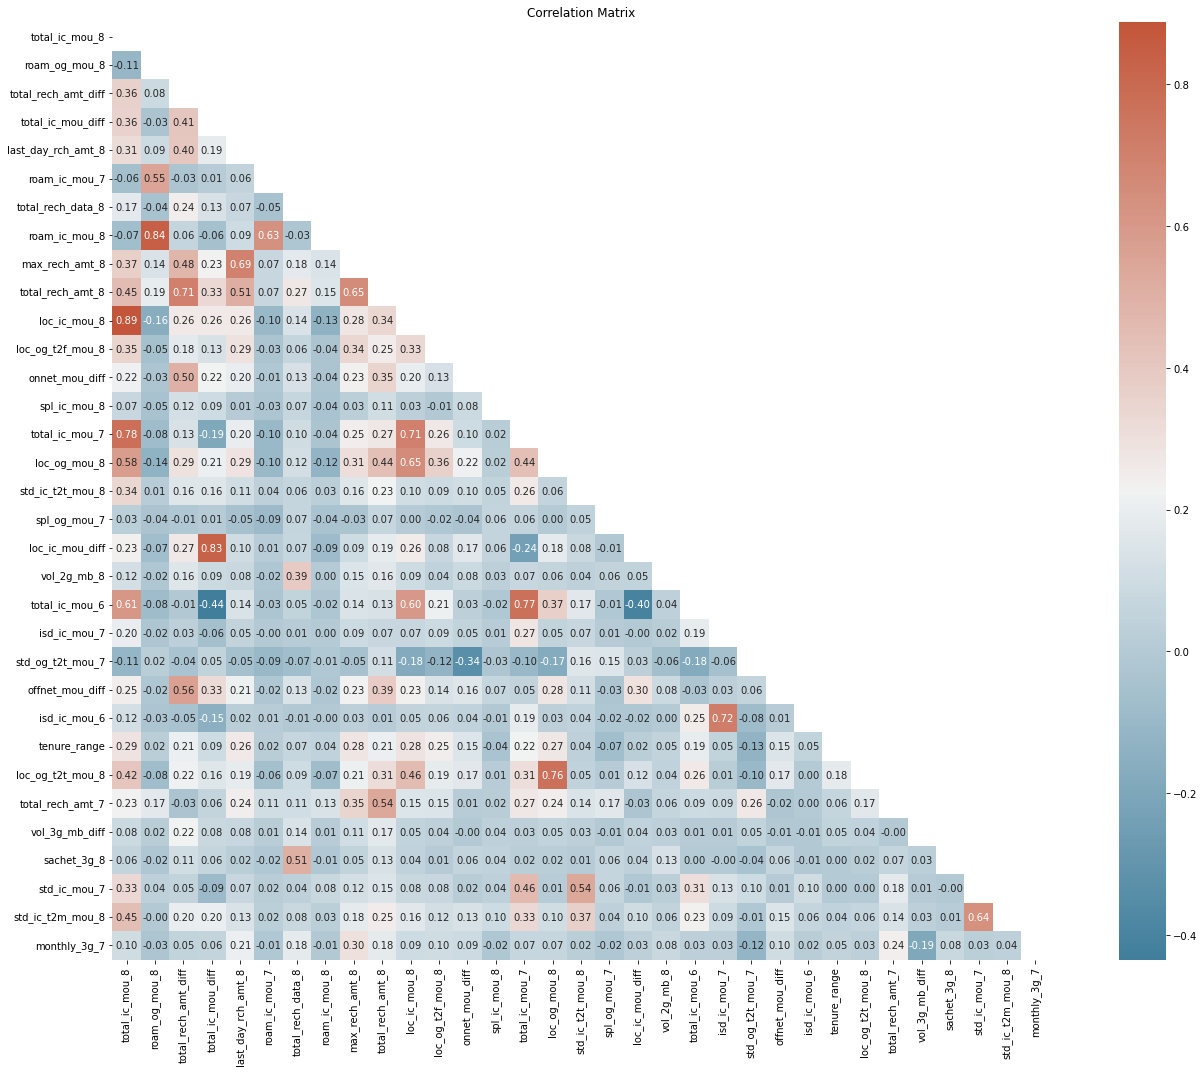

In [164]:
# Plotting heatmap of important features

plt.figure(figsize=(20, 15))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(df.corr()))

# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(X_train_sm[df.columns].corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()
plt.show()

In [165]:
df.columns

Index(['total_ic_mou_8', 'roam_og_mou_8', 'total_rech_amt_diff',
       'total_ic_mou_diff', 'last_day_rch_amt_8', 'roam_ic_mou_7',
       'total_rech_data_8', 'roam_ic_mou_8', 'max_rech_amt_8',
       'total_rech_amt_8', 'loc_ic_mou_8', 'loc_og_t2f_mou_8',
       'onnet_mou_diff', 'spl_ic_mou_8', 'total_ic_mou_7', 'loc_og_mou_8',
       'std_ic_t2t_mou_8', 'spl_og_mou_7', 'loc_ic_mou_diff', 'vol_2g_mb_8',
       'total_ic_mou_6', 'isd_ic_mou_7', 'std_og_t2t_mou_7', 'offnet_mou_diff',
       'isd_ic_mou_6', 'tenure_range', 'loc_og_t2t_mou_8', 'total_rech_amt_7',
       'vol_3g_mb_diff', 'sachet_3g_8', 'std_ic_mou_7', 'std_ic_t2m_mou_8',
       'monthly_3g_7'],
      dtype='object', name='Features')

## Important Features

Now, we will move ahead with the features we received from the previous step as these features are Important Features which are helpful in gaining meaning insights.

They are:

**'total_ic_mou_8', 
'roam_og_mou_8', 
'total_rech_amt_diff',
'total_ic_mou_diff',
'last_day_rch_amt_8',
'roam_ic_mou_7',
'total_rech_data_8', 
'roam_ic_mou_8',
'max_rech_amt_8',
'total_rech_amt_8', 
'loc_ic_mou_8',
'loc_og_t2f_mou_8',
'onnet_mou_diff',
'spl_ic_mou_8',
'total_ic_mou_7',
'loc_og_mou_8',
'std_ic_t2t_mou_8',
'spl_og_mou_7',
'loc_ic_mou_diff',
'vol_2g_mb_8',
'total_ic_mou_6',
'isd_ic_mou_7',
'std_og_t2t_mou_7', 
'offnet_mou_diff',
'isd_ic_mou_6',
'tenure_range',
'loc_og_t2t_mou_8',
'total_rech_amt_7',
'vol_3g_mb_diff',
'sachet_3g_8',
'std_ic_mou_7',
'std_ic_t2m_mou_8',
'monthly_3g_7'**

In [166]:
# Building a logistic regression model with the important features. 

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

params = {"C" : [0.1, 0.5, 1, 10, 100, 1000]}

logreg_model_cv = GridSearchCV(estimator = LogisticRegression(), param_grid = params, scoring = "recall", cv = folds, verbose = 1, return_train_score = True)

logreg_model_cv.fit(X_train_sm[df.columns], y_train_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [167]:
logreg_model_cv.best_params_

{'C': 1}

In [168]:
logreg_model = LogisticRegression(C = 0.1)
logreg_model.fit(X_train_sm[df.columns], y_train_sm)

LogisticRegression(C=0.1)

In [169]:
# Obtaining logistic regression coefficients
coefficients_df = pd.DataFrame(logreg_model.coef_, columns=df.columns)
intercept_df = pd.DataFrame(logreg_model.intercept_.reshape((1,1)), columns = ['intercept'])
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients.T.rename(columns = {0: "Coefficients"})

,Coefficients
intercept,-1.229717
total_ic_mou_8,-2.713003
roam_og_mou_8,0.317728
total_rech_amt_diff,-0.126412
total_ic_mou_diff,-1.357076
last_day_rch_amt_8,-0.508633
roam_ic_mou_7,0.140205
total_rech_data_8,-0.419946
roam_ic_mou_8,-0.070080
max_rech_amt_8,0.214468


## The Conclusion

After doing all the analysis, we can conclude a couple of things related to this Case Study which are based upon our findings:

1. In our analysis, we observed that the Logistic Regression with PCA has performed the best in determining the Sensitivity.
2. Same goes for Logistic Regression without PCA, which has also performed great in finding the Sensitivity.
3. Also, after the Logistic Regression, Decision Tree has perfomed well in determining the Sensitivity.
4. We observed that the Logistic Model without PCA has good sensitivity and accuracy and this is comparable to the models with PCA. 
5. Hence, we can go for the more Simplistic Model like Logistic Regression with PCA since it explains the important predictor variables as well as the significance of each predictor. 
6. This model also helps us to identify the variables which should be focused for making the decision of the to-be-churned Customers. Therefore, this model is more relevant in terms of explaining the business objective.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Recommendations

As we are end of our Telecom Churn Case Study, we can give following Business Recommendations to helpout the Telecom Company in retaining their existing Customers:

1. The incoming minutes of usage is observed to affect the churning. 
2. The Telecom Company needs to pay attention to roaming rates for users whose outgoing minutes are increasing. These customers are more likely to churn.
3. The Customers whose total recharge amounts are higher during the August(ideally increasing compared to prior months) are more likely to churn.
4. The Telecom Company needs to focus on STD rates as the customers whose STD minutes of usage are increasing are a likely candidate for churn.
5. The Customers who have data usage has been decreasing are more likely to churn.
6. The Telecom Company needs to improve 2G and 3G Networking per area coverage where 2G and 3G services are not good as it is a strong indicator of churn behaviour.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Now, we have come to an End of our Telecom Churn Case Study. We did a lot of analysis on the provided Data and we found some really great insights. This group case study was a great oppurtunity to learn about Logistic Regression, Feature Engineering, Model Building, Model Validation, Random Forest, Bagging & Bosting, Decision Tree, PCA and Evaluation. Also, it was a great chance to learn and implement the libraries of imblearn, statsmodels and sklearn. We want to thank upGrad and IIIT-B for this amazing learning opportunity.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## The End

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**